In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import matplotlib
%matplotlib inline

In [57]:
n = 20000
PATH = f'scr_mk27/fluxes_and_metric_{n}.parquet'

In [58]:
summary = pd.read_parquet(PATH)

In [59]:
summary

,fluxes,metric,n_times,primary_mass,sma,q,period,inclination,ecc,secondary_mass
0,"[22.826190367432893, 22.842317972894485, 22.87...","[0.0, 0.0020749933283248367, 0.002895476546189...",50,1.0,24.610161,1.0,10.0,90.0,0.6,1.0
1,"[22.82616911328715, 22.842264435921468, 22.870...","[0.0, 0.00039227412160869335, 0.00065218500859...",50,1.0,17.627886,0.5,7.0,90.0,0.3,0.5
2,"[22.826354798180244, 22.842872953339707, 22.87...","[0.0, 0.0003950167087545253, 0.000326247711186...",50,1.0,11.028809,1.0,3.0,90.0,0.0,1.0
3,"[22.829217188383673, 22.848219418190972, 22.87...","[0.0, 0.00013895808460162584, 0.00025079569327...",50,1.0,4.817276,0.5,1.0,90.0,0.0,0.5
4,"[22.826105735375826, 22.84185413454979, 22.870...","[0.0, 0.0007391978315354208, 0.001020283134490...",50,3.0,32.248434,0.5,10.0,90.0,0.3,1.5
...,...,...,...,...,...,...,...,...,...,...
542,"[22.826257574314113, 22.83216559595251, 22.842...","[0.0, 0.00010439041201948385, 8.45343569366718...",100,3.0,14.451828,0.5,3.0,90.0,0.3,1.5
543,"[22.826507461185244, 22.831211986798348, 22.83...","[0.0, 7.478312550190935e-05, 7.925624711546675...",100,1.0,10.020338,0.5,3.0,85.0,0.0,0.5
544,"[22.826152478626657, 22.82790220299041, 22.830...","[0.0, 8.783928641875605e-05, 7.840211567256006...",100,5.0,17.134537,0.5,3.0,85.0,0.0,2.5
545,"[22.828438930036583, 22.836001322359788, 22.84...","[0.0, 0.00018506970650022936, 0.00015902024010...",100,1.0,5.302098,1.0,1.0,90.0,0.0,1.0


In [60]:
summary['q'].max()

1.0

In [61]:
summary = summary[summary['period']<=10.0]

In [62]:
summary.columns

Index(['fluxes', 'metric', 'n_times', 'primary_mass', 'sma', 'q', 'period',
       'inclination', 'ecc', 'secondary_mass'],
      dtype='object')

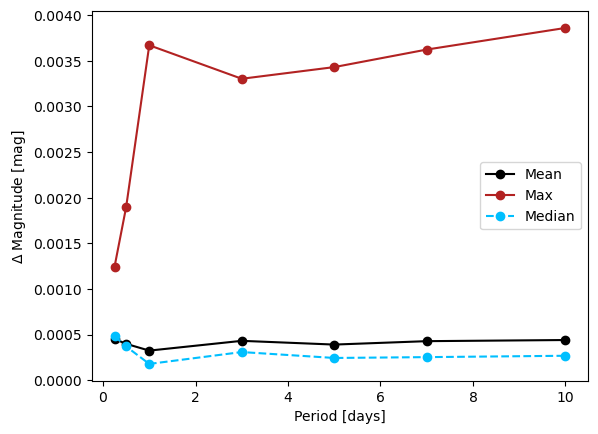

In [63]:
import pandas as pd
import numpy as np

# Make sure the metric column is list-like
# If it's a string representation, you'll need ast.literal_eval — tell me if that's the case.
fig = plt.figure()
stat = 'period'
stat_label = 'Period [days]'

df_exploded = summary.explode("metric")
df_exploded["metric"] = df_exploded["metric"].astype(float)
stats = (
    df_exploded
    .groupby(stat)["metric"]
    .agg(["mean", "max", "std", "median"])
    .reset_index()
)
plt.plot(stats[stat], stats['mean'], marker='o', label='Mean', color='black')
plt.plot(stats[stat], stats['max'], marker='o', label='Max', color='firebrick')
plt.plot(stats[stat], stats['median'], marker='o', label='Median', color='deepskyblue', linestyle='--')
plt.xlabel(stat_label)
plt.ylabel(r'$\Delta$ Magnitude [mag]')
plt.legend()

In [64]:
df_exploded['metric'].mean(), df_exploded['metric'].median(), df_exploded['metric'].std(), df_exploded['metric'].max()

(0.00039320864185297277,
 0.0002997593312095148,
 0.0004194675736867941,
 0.003858957953259079)

In [65]:
fig.savefig(f'scr_mk27/residuals_per_period_{n}.png', dpi=300, bbox_inches='tight')